In [1]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

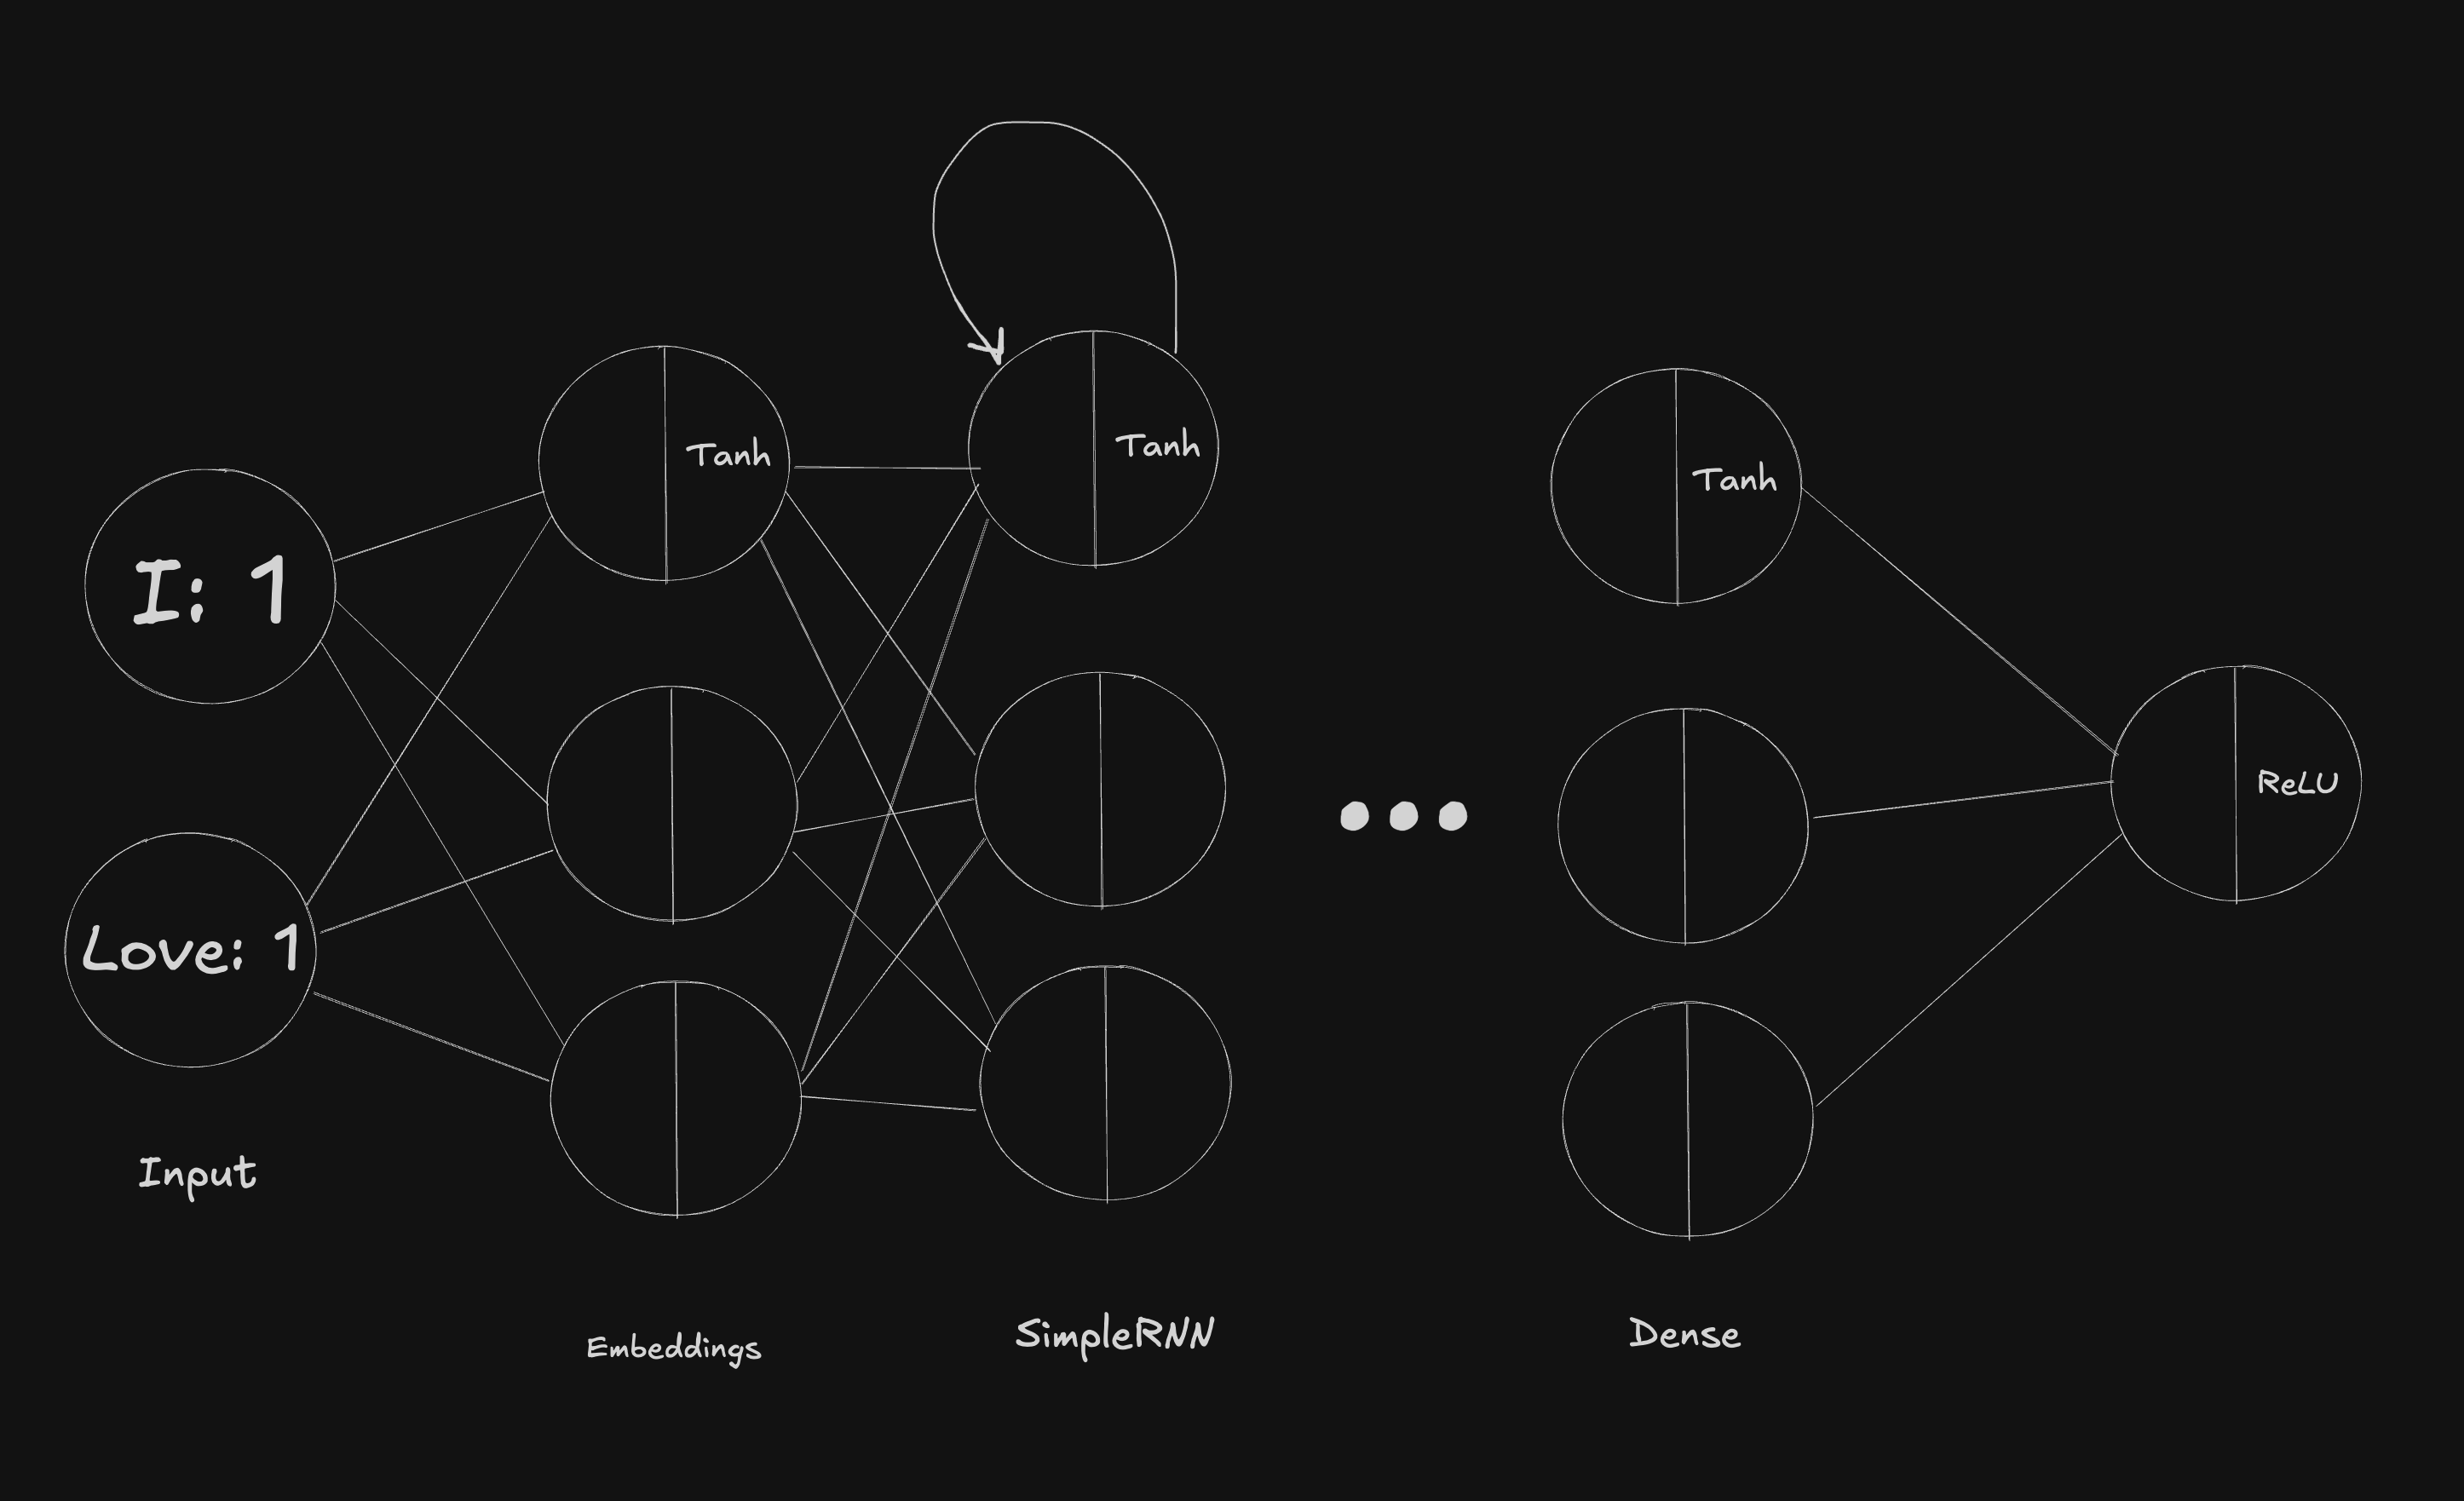

In [2]:
inputs = [
    "I love this product",
    "This product is the best",
    "It is a fantastic product",
    "This is a bad product",
]

In [5]:
def Embedding(inputs):
    tokenized_sequences = [word_tokenize(sentence.lower()) for sentence in inputs]
    print("\nTokenized Sequences:\n", tokenized_sequences)
    all_words = sorted(set(word for seq in tokenized_sequences for word in seq))
    print("\nAll Words:\n", all_words)
    word_to_index = {word: i for i, word in enumerate(all_words, start=0)}  
    print("\nWord to Index Mapping:\n", word_to_index)
    vocab_size = len(word_to_index)  

    one_hot_encoded = []
    for seq in tokenized_sequences:
        sentence_vector = np.zeros(vocab_size) 
        for word in seq:
            if word in word_to_index:
                index = word_to_index[word]
                sentence_vector[index] = 1  
        one_hot_encoded.append(sentence_vector)



    return one_hot_encoded

sentence_embeddings = Embedding(inputs)
print("\nFinal Sentence Embeddings:\n", sentence_embeddings)


Tokenized Sequences:
 [['i', 'love', 'this', 'product'], ['this', 'product', 'is', 'the', 'best'], ['it', 'is', 'a', 'fantastic', 'product'], ['this', 'is', 'a', 'bad', 'product']]

All Words:
 ['a', 'bad', 'best', 'fantastic', 'i', 'is', 'it', 'love', 'product', 'the', 'this']

Word to Index Mapping:
 {'a': 0, 'bad': 1, 'best': 2, 'fantastic': 3, 'i': 4, 'is': 5, 'it': 6, 'love': 7, 'product': 8, 'the': 9, 'this': 10}

Final Sentence Embeddings:
 [array([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.]), array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.]), array([1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.]), array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.])]


In [7]:
sentence_embeddings


[array([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.]),
 array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.]),
 array([1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.]),
 array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.])]

In [12]:
np.array(sentence_embeddings).shape[1]

11

In [23]:
def SimpleRNN(inputs):
    sentence_embeddings = Embedding(inputs)
    sentence_embeddings = np.array(sentence_embeddings)
    print("Sentence Embeddings Shape:", sentence_embeddings.shape)

    input_size = sentence_embeddings.shape[1]  # dynamically get input size
    hidden_size = 3
    output_size = 3

    # Create RNN weights
    I = np.random.rand(hidden_size, input_size)  # (3, input_size)
    H = np.random.rand(hidden_size, hidden_size)  # (3, 3)
    Output = np.random.rand(output_size, hidden_size)  # (3, 3)

    h = np.zeros(hidden_size)
    y = []

    for s in sentence_embeddings:
        print("Current Input Shape:", s.shape)
        print("Current Hidden State Shape:", h.shape)
        print("Current Weights I Shape:", I.shape)
        print("Current Weights H Shape:", H.shape)
        print("Current Weights Output Shape:", Output.shape)
        print("Current Input:", s)
        print("Current Hidden State:", h)
        print("Current Weights I:", I)
        print("Current Weights H:", H)
        print("Current Weights Output:", Output)
        # RNN computation
        h = np.tanh(np.dot(I, s) + np.dot(H, h))  # (3,)
        o = np.dot(Output, h)  # (3,)
        
        y.append(o)

    return y

In [24]:
sentence_embeddings = Embedding(inputs)
sentence_embeddings


Tokenized Sequences:
 [['i', 'love', 'this', 'product'], ['this', 'product', 'is', 'the', 'best'], ['it', 'is', 'a', 'fantastic', 'product'], ['this', 'is', 'a', 'bad', 'product']]

All Words:
 ['a', 'bad', 'best', 'fantastic', 'i', 'is', 'it', 'love', 'product', 'the', 'this']

Word to Index Mapping:
 {'a': 0, 'bad': 1, 'best': 2, 'fantastic': 3, 'i': 4, 'is': 5, 'it': 6, 'love': 7, 'product': 8, 'the': 9, 'this': 10}


[array([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.]),
 array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.]),
 array([1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.]),
 array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.])]

In [25]:
output = SimpleRNN(inputs)


Tokenized Sequences:
 [['i', 'love', 'this', 'product'], ['this', 'product', 'is', 'the', 'best'], ['it', 'is', 'a', 'fantastic', 'product'], ['this', 'is', 'a', 'bad', 'product']]

All Words:
 ['a', 'bad', 'best', 'fantastic', 'i', 'is', 'it', 'love', 'product', 'the', 'this']

Word to Index Mapping:
 {'a': 0, 'bad': 1, 'best': 2, 'fantastic': 3, 'i': 4, 'is': 5, 'it': 6, 'love': 7, 'product': 8, 'the': 9, 'this': 10}
Sentence Embeddings Shape: (4, 11)
Current Input Shape: (11,)
Current Hidden State Shape: (3,)
Current Weights I Shape: (3, 11)
Current Weights H Shape: (3, 3)
Current Weights Output Shape: (3, 3)
Current Input: [0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
Current Hidden State: [0. 0. 0.]
Current Weights I: [[0.78584228 0.15251236 0.55108528 0.5327568  0.61877494 0.62486028
  0.44513191 0.53057111 0.36268426 0.62234588 0.20878574]
 [0.57604423 0.39043526 0.75109425 0.44358602 0.33865448 0.56381768
  0.54046888 0.19328871 0.12577987 0.64952866 0.08838319]
 [0.17224    0.41334513 0

In [26]:
output

[array([1.17576043, 1.69276967, 0.45809435]),
 array([1.40903987, 1.80354491, 0.50764759]),
 array([1.41081003, 1.80319348, 0.50831521]),
 array([1.40910094, 1.80375769, 0.50780779])]